In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("spam.csv")

In [3]:
dataset["labels"]=dataset["v1"]
dataset["messages"]=dataset["v2"]
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,ham,The guy did some bitching but I acted like i'd...


In [4]:
data=dataset[["labels","messages"]]

In [5]:
data

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   labels    5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.describe()

,labels,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
data['labels']=data['labels'].map({'ham': 0, 'spam': 1})

C:\Users\adity\AppData\Local\Temp\ipykernel_19436\113192375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['labels']=data['labels'].map({'ham': 0, 'spam': 1})


In [9]:
data

,labels,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

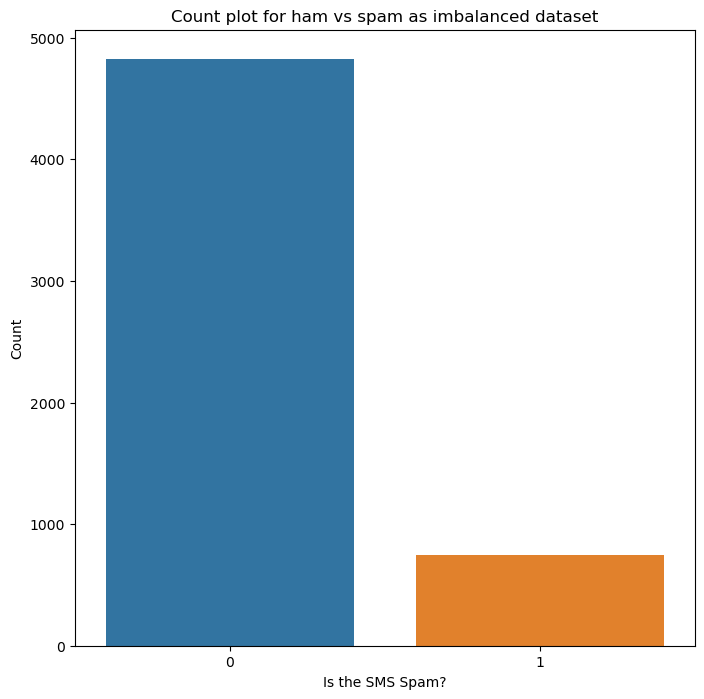

In [11]:
#Count plot for ham vs spam as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='labels',data=data)
p=plt.title('Count plot for ham vs spam as imbalanced dataset')
p=plt.xlabel('Is the SMS Spam?')
p=plt.ylabel('Count')

In [12]:
#Handling imbalanced dataset using Oversampling
only_spam=data[data['labels']==1]

In [13]:
only_spam

,labels,messages
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [14]:
len(data)-len(only_spam)

4825

In [15]:
count = int((data.shape[0]-only_spam.shape[0])/only_spam.shape[0])

In [16]:
count

6

In [17]:
for i in range(0,count-1):
    data = pd.concat([data,only_spam])


data.shape

(9307, 2)

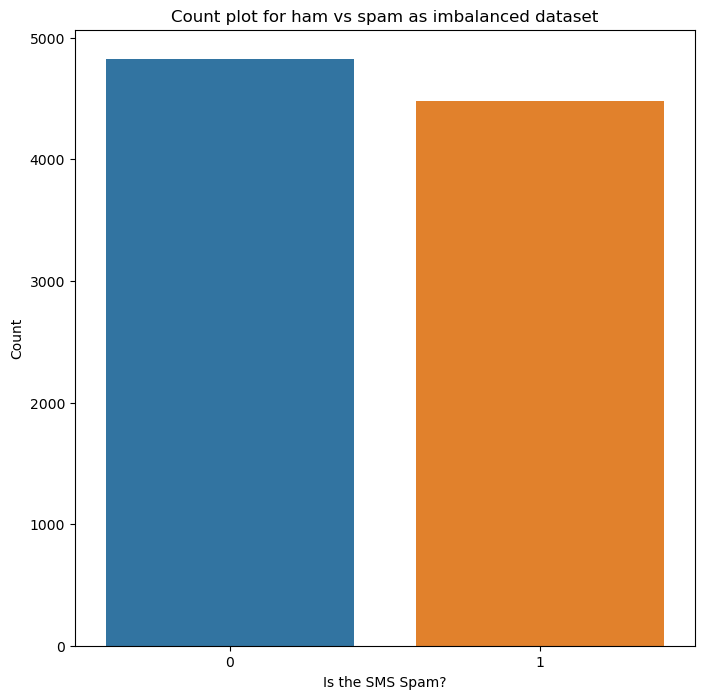

In [18]:
#Count plot for ham vs spam as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='labels',data=data)
p=plt.title('Count plot for ham vs spam as imbalanced dataset')
p=plt.xlabel('Is the SMS Spam?')
p=plt.ylabel('Count')

In [19]:
#Creating new feature word count
data['word_count']= data['messages'].apply(lambda x: len(x.split()))

In [20]:

data

,labels,messages,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


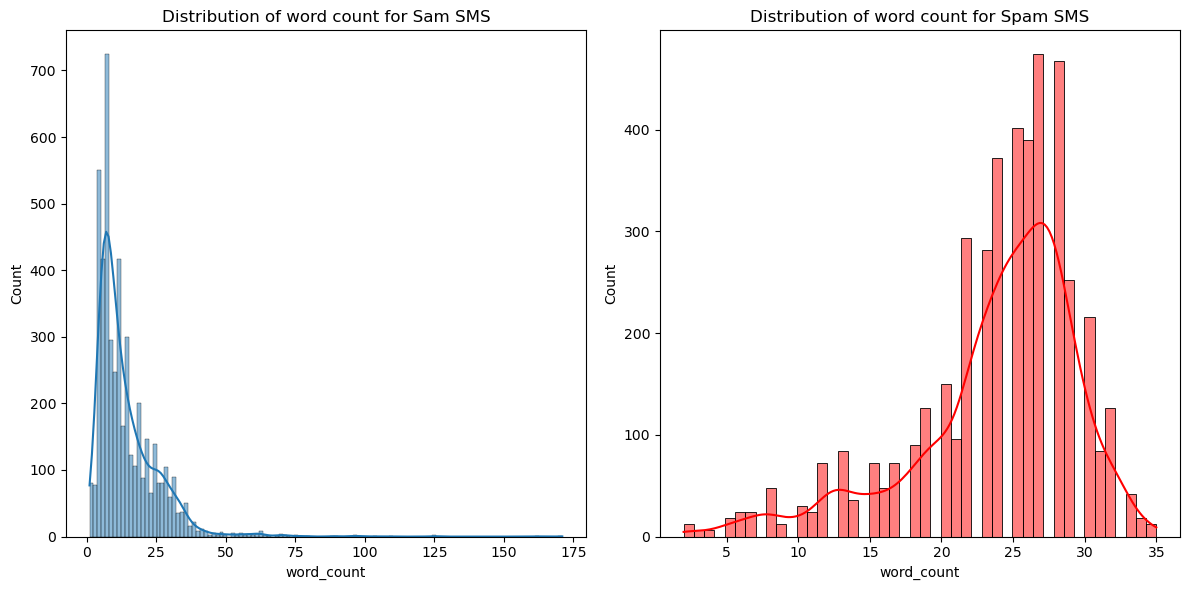

In [21]:
plt.figure(figsize=(12,6))

#(1,1)
plt.subplot(1,2,1)
g=sns.histplot(data[data['labels']==0].word_count, kde=True)
p=plt.title('Distribution of word count for Sam SMS')

#(1,2)
plt.subplot(1,2,2)
g=sns.histplot(data[data['labels']==1].word_count,color="red", kde=True)
plt.title('Distribution of word count for Spam SMS')

plt.tight_layout()
plt.show()

In [22]:
#Creating new feature containing currency symbols

def currency_present(data):
    currency_symbols = ['$','€','¥','£','₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [23]:
data["contains_currency_symbols"]=data['messages'].apply(currency_present)

In [24]:
data

,labels,messages,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


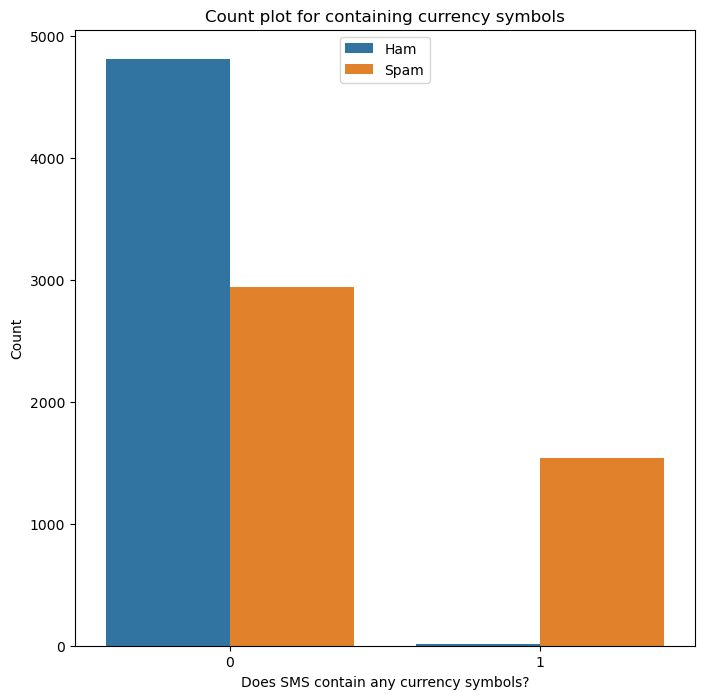

In [25]:
#Countplot for contains currency symbols
plt.figure(figsize=(8,8))
g=sns.countplot(x='contains_currency_symbols',data=data, hue='labels')
p=plt.title("Count plot for containing currency symbols")
p=plt.xlabel("Does SMS contain any currency symbols?")
p=plt.ylabel("Count")
p=plt.legend(labels=["Ham","Spam"], loc =9)

In [26]:
#Creating new feature containing numbers
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

In [27]:
data["contains_number"]=data["messages"].apply(number)

In [28]:
data

,labels,messages,word_count,contains_currency_symbols,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


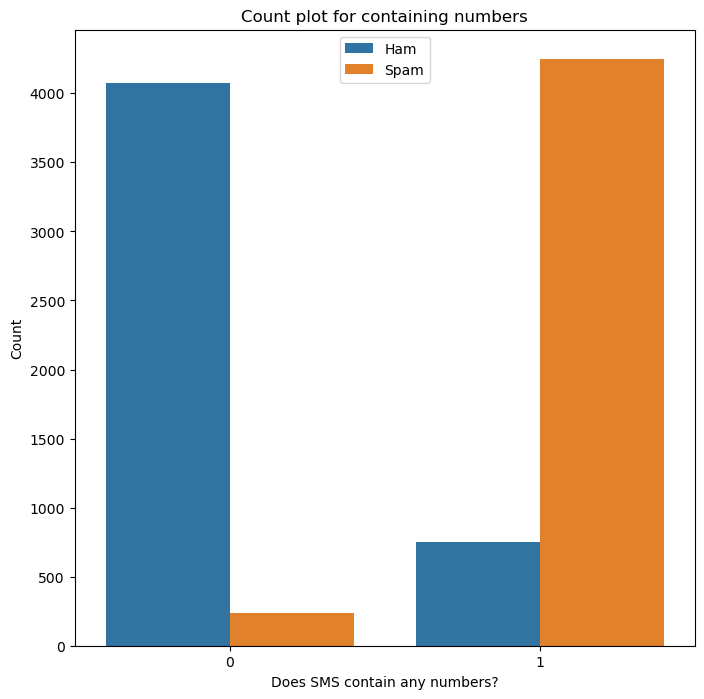

In [29]:
#Countplot for containing numbers
plt.figure(figsize=(8,8))
g=sns.countplot(x='contains_number',data=data, hue='labels')
p=plt.title("Count plot for containing numbers")
p=plt.xlabel("Does SMS contain any numbers?")
p=plt.ylabel("Count")
p=plt.legend(labels=["Ham","Spam"], loc =9)

In [30]:
#Data Cleaning
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(data.messages):
    messages = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sms)
    messages = messages.lower()
    words = messages.split()
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    messages = ' '.join(lemm_words)
    
    corpus.append(messages) 


In [32]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [33]:
#Creating the Bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [34]:
X=pd.DataFrame(vectors, columns = feature_names)
y=data['labels']

In [37]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
3533,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4253,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
cv = cross_val_score(nb, X, y, scoring='f1', cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.944
0.004


In [45]:
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       958
           1       0.94      0.94      0.94       904

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [47]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[908,  50],
       [ 57, 847]], dtype=int64)

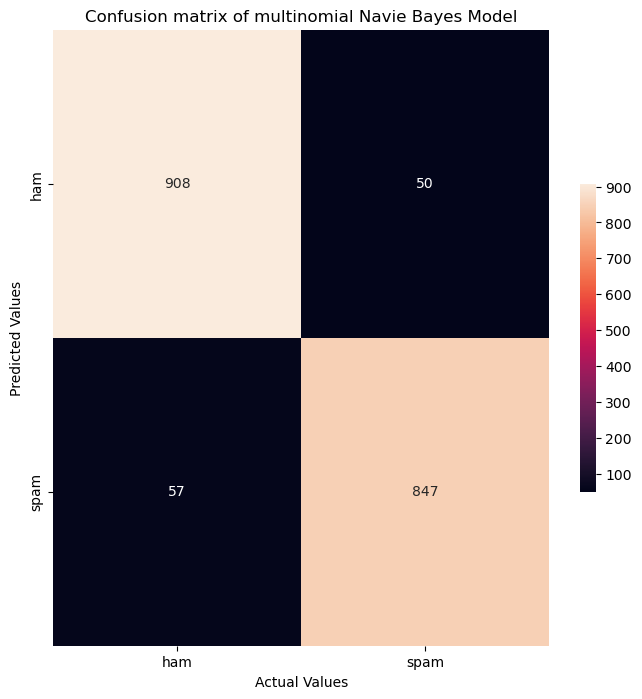

In [51]:
plt.figure(figsize=(8,8))
axis_labels=['ham','spam']
g= sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, fmt = 'g', cbar_kws= {'shrink':0.5})
p= plt.title('Confusion matrix of multinomial Navie Bayes Model')
p=plt.xlabel('Actual Values')
p=plt.ylabel('Predicted Values')

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt, X, y, scoring='f1', cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.98
0.004


In [54]:
dt.fit(X_train,y_train)
y_pred1=dt.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       958
           1       0.96      1.00      0.98       904

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [56]:
cm = confusion_matrix(y_test,y_pred1)
cm

array([[922,  36],
       [  3, 901]], dtype=int64)

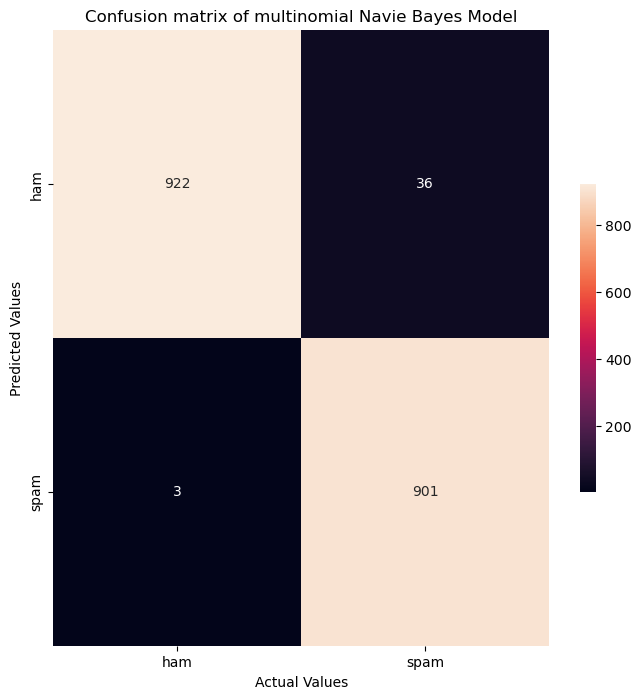

In [57]:
plt.figure(figsize=(8,8))
axis_labels=['ham','spam']
g= sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, fmt = 'g', cbar_kws= {'shrink':0.5})
p= plt.title('Confusion matrix of multinomial Navie Bayes Model')
p=plt.xlabel('Actual Values')
p=plt.ylabel('Predicted Values')

In [61]:
def predict_spam(data):
    messages = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sms)
    messages = messages.lower()
    words = messages.split()
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    messages = ' '.join(lemm_words)
    temp = tfidf.transform([messages]).toarray()
    return nb.predict(temp)

In [62]:
#Predicition
sample_message = 'IMPORTANT  You could be entitled to upto  in compensation from sls.sold PPI on a credit card or loan'

if predict_spam(sample_message):
    print('This is a spam message')
else:
    print('This is a HAM(normal) message')

This is a spam message


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
